# K-Nearest Neighbors
Read Chapter 4 of ISL

### KNN
The KNN algorithm is very simple and very effective. It is widely applied in areas like finance, political science, handwriting detection, and image recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. It is used for solving both classification and regression problems.

KNN is best shown through an example! Imagine we had some imaginary data on dogs and horses with heights and weights. If we plot them out we have something like this…

## Training Algorithm:

- Store all the Data

## Prediction Algorithm:

- Calculate the distance from x to all points in your data
- Sort the points in your data by increasing distance from x
- Predict the majority label of the “k” closest points

Choosing a K will affect what class a new point is assigned to:

<img src = "https://datascienceplus.com/wp-content/uploads/2019/04/Screenshot-74.png">

In above example if k=3 then new point will be in class B but if k=6 then it will in class A. Because majority of points in k=6 circle are from class A.

Lets return back to our imaginary data on Dogs and Horses:

<img src = "https://datascienceplus.com/wp-content/uploads/2019/04/Screenshot-77.png">
<img src = "https://datascienceplus.com/wp-content/uploads/2019/04/Screenshot-78.png">

If we choose k=1 we will pick up a lot of noise in the model. But if we increase value of k, you’ll notice that we achieve smooth separation or bias. This cleaner cut-off is achieved at the cost of miss-labeling some data points.

You can read more about Bias variance tradeoff.

Pros:

- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data
- Few parameters ○ K ○ Distance Metric

Cons:

- High Prediction Cost (worse for large data sets)
- Not good with high dimensional data
- Categorical Features don’t work well

Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.



In [1]:
# Get the Data
#install.packages("ISLR")
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

In [2]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [3]:
summary(Caravan)

    MOSTYPE         MAANTHUI         MGEMOMV         MGEMLEEF    
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
    MOSHOOFD          MGODRK           MGODPR          MGODOV    
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
     MGODGE          MRELGE          MRELSA           MRELOV    
 Min.   :0.

__Let's clean up the data and verify there are no NA values__

In [4]:
any(is.na(Caravan))

[1] FALSE

In [5]:
var(Caravan[,1])
var(Caravan[,2])

[1] 165.0378

[1] 0.1647078

In [6]:
purchase <- Caravan[,86]

standardize.Caravan <- scale(Caravan[,1:85])
print(var(standardize.Caravan[,1]))
print(var(standardize.Caravan[,2]))

[1] 1
[1] 1


In [7]:
# Start the Train Test Split

test.index <- 1:1000 
test.data <- standardize.Caravan[test.index,]
test.purchase <- purchase[test.index]

train.data <- standardize.Caravan[-test.index,]
train.purchase <- purchase[-test.index]

In [8]:
library(class)
set.seed(101)

In [9]:
predicted.purchase <- knn(train.data, test.data, train.purchase, k = 5)
print(head(predicted.purchase))

[1] No No No No No No
Levels: No Yes


In [10]:
misclass.error <- mean(test.purchase != predicted.purchase)
print(misclass.error)

[1] 0.066


In [11]:
predicted.purchase <- NULL
error.rate <- NULL

for (i in 1:20){
    set.seed(101)
    predicted.purchase <- knn(train.data, test.data, train.purchase, k = i)
    error.rate[i] <- mean (test.purchase != predicted.purchase)
}

print(error.rate)

 [1] 0.116 0.107 0.074 0.070 0.066 0.064 0.062 0.061 0.058 0.058 0.059 0.058
[13] 0.059 0.059 0.059 0.059 0.059 0.059 0.059 0.059


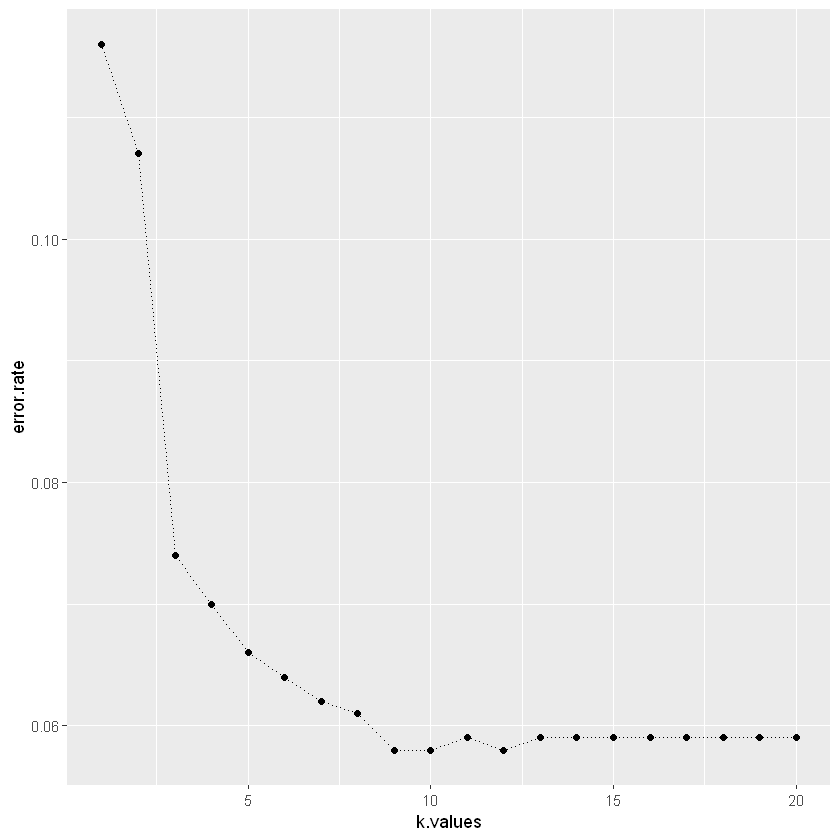

In [14]:
#Visualize K Elbow Method

library(ggplot2)
k.values <- 1:20
error.df <- data.frame(error.rate,k.values)

ggplot(data = error.df, aes( x = k.values, y = error.rate)) + 
geom_point() + geom_line(lty ='dotted')
